# Multilayer Perceptron
We build a multilayered perceptron with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size, and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

<img src="multilayerPerceptron.jpg" alt="Drawing" style="width: 450px;"/>

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

## MNIST Data Set

The MNIST data set consists of $70000$ images of hand written digits, $60000$ of which are typically used as labeled training examples, where the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.

<img src="MnistExamples.png" alt="Drawing" style="width: 500px;"/>


Each image in the MNIST data set is stored as a matrix.

<img src="MNIST-Matrix.png" alt="Drawing" style="width: 500px;"/>

In [2]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()


The data structures train_X and test_X are stored as 3 dimensional tensors. 
 
 
 
<img src="order-3-tensor.png" alt="Drawing" style="width: 300px;"/>

In [3]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
X = []
for i, x in enumerate(train_X):
    X.append(x.flatten().reshape(784, 1))
    
# One hot encode the training labels
Y = []
for label in train_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label][0] = 1.0
    Y.append(temp_vec)

# Store the training data as a tuple
train_data = [x for x in zip(X, Y)]


# Do the same for the testing data 
X = []
for i, x in enumerate(test_X):
    X.append(x.flatten().reshape(784, 1))
    
Y = []
for label in test_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label] = 1.0
    Y.append(temp_vec)
    
test_data = [x for x in zip(X, Y)]

In [4]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [5]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

In [6]:
W, B = initialize_weights(layers = [784, 60, 60, 10])
a0, y0 = train_data[0]
Z = [[0.0]]
A = [a0]
L = 4
for i in range(1, L):
    z = W[i]@A[i-1] + B[i]
    a = sigmoid(z)
    
    Z.append(z)
    A.append(a)
A

[array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

---

## The Output Error

In calculating the gradient, we begin by calculating the output error as follows:

$$
\delta^{L-1} = \nabla_aC 

$$


---

In [73]:
deltas = dict()
delta_last = (A[-1] - y)*d_sigmoid(Z[-1])
deltas[L-1] = delta_last
deltas

{3: array([[ 0.1257943 ],
        [ 0.11588961],
        [ 0.11891609],
        [ 0.01907674],
        [ 0.11706061],
        [-0.13243696],
        [ 0.1310112 ],
        [ 0.09284749],
        [ 0.14263488],
        [ 0.07312097]])}

In [74]:
deltas[L-2] = (W[L-1].T @ deltas[L-1])* d_sigmoid(Z[L-2])
deltas

{3: array([[ 0.1257943 ],
        [ 0.11588961],
        [ 0.11891609],
        [ 0.01907674],
        [ 0.11706061],
        [-0.13243696],
        [ 0.1310112 ],
        [ 0.09284749],
        [ 0.14263488],
        [ 0.07312097]]),
 2: array([[-2.74145318e-02],
        [-1.19551884e-02],
        [ 1.99237074e-03],
        [ 2.72731038e-03],
        [ 1.26543794e-03],
        [-1.76326621e-02],
        [-1.22397192e-02],
        [ 1.85250151e-03],
        [ 3.25321293e-05],
        [ 1.95266047e-02],
        [-5.61238713e-03],
        [-9.56981320e-03],
        [ 3.38255627e-03],
        [-2.35183159e-02],
        [-9.48784012e-03],
        [ 1.69002354e-02],
        [-1.78050069e-02],
        [-5.53590538e-03],
        [-3.39986190e-02],
        [ 1.00420981e-02],
        [-2.00944979e-02],
        [ 2.33284897e-02],
        [-1.83094130e-03],
        [-7.63561430e-03],
        [ 9.39031042e-03],
        [-1.61079162e-02],
        [-1.12075043e-02],
        [-2.46836188e-02],
      

In [75]:
deltas[L-3] = (W[L-2].T @ deltas[L-2])*d_sigmoid(Z[L-3])
deltas

{3: array([[ 0.1257943 ],
        [ 0.11588961],
        [ 0.11891609],
        [ 0.01907674],
        [ 0.11706061],
        [-0.13243696],
        [ 0.1310112 ],
        [ 0.09284749],
        [ 0.14263488],
        [ 0.07312097]]),
 2: array([[-2.74145318e-02],
        [-1.19551884e-02],
        [ 1.99237074e-03],
        [ 2.72731038e-03],
        [ 1.26543794e-03],
        [-1.76326621e-02],
        [-1.22397192e-02],
        [ 1.85250151e-03],
        [ 3.25321293e-05],
        [ 1.95266047e-02],
        [-5.61238713e-03],
        [-9.56981320e-03],
        [ 3.38255627e-03],
        [-2.35183159e-02],
        [-9.48784012e-03],
        [ 1.69002354e-02],
        [-1.78050069e-02],
        [-5.53590538e-03],
        [-3.39986190e-02],
        [ 1.00420981e-02],
        [-2.00944979e-02],
        [ 2.33284897e-02],
        [-1.83094130e-03],
        [-7.63561430e-03],
        [ 9.39031042e-03],
        [-1.61079162e-02],
        [-1.12075043e-02],
        [-2.46836188e-02],
      

In [76]:
alpha = 0.004
W[1] = W[1] - alpha*deltas[1] @ A[1-1].T
B[1] = B[1] - alpha*deltas[1]
W[1]

array([[-0.02481728,  0.01211405,  0.15706808, ...,  0.0188953 ,
        -0.04400579, -0.00640458],
       [-0.01537355, -0.04927287, -0.07853923, ..., -0.08698741,
        -0.04393028, -0.0626314 ],
       [ 0.05632389,  0.01874542, -0.04781321, ...,  0.00424884,
         0.01039422, -0.06425682],
       ...,
       [ 0.03404232,  0.07260923,  0.02143148, ...,  0.01718082,
        -0.00782401,  0.00964485],
       [-0.0173696 , -0.05237016,  0.04190053, ..., -0.03920486,
        -0.02925154, -0.00019587],
       [ 0.08666226, -0.02646092,  0.05075804, ...,  0.06209173,
        -0.00357968,  0.03947765]])

In [77]:
W[2] = W[2] - alpha*deltas[2] @ A[2-1].T
B[2] = B[2] - alpha*deltas[2]
W[2]

array([[ 2.15393077e-01,  2.36034696e-01, -4.88472280e-01, ...,
        -1.08847209e-01,  2.97263345e-01, -4.07435520e-02],
       [-1.35914595e-01, -8.76113059e-03, -1.31173341e-02, ...,
        -2.77651091e-01, -2.57498540e-04,  3.35013588e-01],
       [-5.15500421e-02,  1.79649809e-02,  1.95577448e-01, ...,
         1.02072104e-01, -1.37381767e-01,  1.74148255e-01],
       ...,
       [-3.47417322e-01, -6.90623877e-02,  4.46795826e-02, ...,
        -3.29531743e-01,  4.01027930e-01,  1.72056878e-01],
       [-1.28339718e-02,  1.76513009e-01, -8.75009653e-02, ...,
        -1.39016588e-01,  1.78519369e-01,  1.02890014e-01],
       [-2.58257209e-01,  2.64955207e-02,  2.71414928e-01, ...,
         9.64030924e-02,  2.48672481e-01, -2.73584264e-01]])

In [78]:
W[3] = W[3] - alpha*deltas[3] @ A[3-1].T
B[3] = B[3] - alpha*deltas[3]
B[3]

array([[-0.11790361],
       [-0.04593871],
       [ 0.11186074],
       [-0.08205104],
       [-0.13708467],
       [ 0.07042898],
       [-0.1572999 ],
       [-0.31919852],
       [ 0.42566724],
       [ 0.14519729]])

In [79]:
for i in range(1, L):
    W[i] -= alpha*deltas[i] @ A[i-1].T
    B[i] -= alpha*deltas[i]
W[3]

array([[-1.14070472e-01, -2.51666260e-01,  3.18842665e-01,
        -3.69095571e-01, -8.31890045e-04, -2.18258583e-01,
        -2.38846172e-01,  2.94926398e-02,  9.79344143e-02,
         3.94720588e-02,  1.98453979e-01, -1.40263445e-01,
         1.60493276e-01, -2.42931162e-01, -1.33339951e-03,
         2.70043202e-01, -2.81921167e-01, -1.46445680e-01,
        -1.53195690e-01,  2.27413602e-01, -3.81881723e-01,
        -1.44286414e-01,  1.60830563e-01,  2.02276661e-03,
         1.82512075e-01,  6.41024686e-02,  5.53610308e-02,
        -1.65718419e-01, -7.40182457e-02, -2.49108141e-01,
        -1.09405150e-01, -4.20540218e-02, -3.25322176e-02,
         2.03077352e-01,  8.13752228e-02, -1.34497332e-01,
         5.19078500e-02,  5.01359124e-01,  2.54325971e-01,
        -1.13526012e-01,  1.27768103e-01, -2.66074078e-01,
        -2.93221693e-01,  8.29676433e-02, -1.57056002e-01,
         1.14709755e-02,  1.77676712e-01, -1.58779610e-01,
         2.96967158e-01,  2.04628694e-01,  1.72632594e-0

In [7]:
def deltas(W, B, x, depth):
    Z, A = forward_pass(W, B, x, depth)
    L = depth
    delta = dict()
    delta[L] = (A[-1] - x[1])*d_sigmoid(Z[-1])
    for i in range(L-1, 1, -1):
        delta[i] = (delta[i+1]@W[i].T)*d_sigmoid(Z[-1])
    
    return A, delta

In [8]:
def forward_pass(W, B, x, depth, predict_vector = False):
    Z = [[0.0]]
    A = [x]
    for i in range(1, depth):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, x, depth):
    _, A = forward_pass(W, B, x, depth)
    return np.argmax(A[-1])

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, x, len(B))}")
    

def MSE(W, B, data, depth):
    cost = 0.0
    m = 0
    for x, y in data:
        a = forward_pass(W, B, x, depth, predict_vector = True)
        cost += mse(a, y)
        m+=1
    return cost/m

In [9]:
W, B = initialize_weights(layers = [784, 60, 60, 10])
print(f"Initial Cost = {MSE(W, B, train_data, 4)}")

Initial Cost = 1.291836365644357


predicted digit is: 7
actual digit is: 4


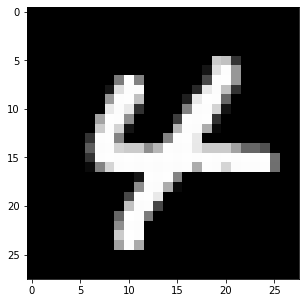

In [10]:
i = np.random.randint(0, len(test_X))
prediction = predict(W, B, test_data[i][0], len(B))
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {test_y[i]}")
plt.figure(figsize=(6, 5))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [11]:
#W, B = initialize_weights(layers = [784, 60, 60, 10])
alpha = 0.046
epochs = 4
L = 4
print(f"Starting Cost = {MSE(W, B, train_data, L)}")
sample_size = len(train_data)
for k in range(epochs):
    for j in range(sample_size):
        x, y = train_data[j]

        Z = [[0.0]]
        A = [x]

        for i in range(1, L):
            z = W[i]@A[i-1] + B[i]
            a = sigmoid(z)
    
            Z.append(z)
            A.append(a)
    
        deltas = dict()
        delta_last = (A[L-1] - y)*d_sigmoid(Z[L-1])
        deltas[L-1] = delta_last
        for i in range(L-2, 0, -1):
            deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
        for i in range(1, L):
            W[i] -= alpha*deltas[i] @ A[i-1].T
            B[i] -= alpha*deltas[i]    


    print(f"{k}-th Cost = {MSE(W, B, train_data, L)}")

Starting Cost = 1.291836365644357
0-th Cost = 0.06898892633217056
1-th Cost = 0.04865319035427756
2-th Cost = 0.03851859866642332
3-th Cost = 0.03239307754038251


In [12]:
alpha = 0.046
epochs = 30
L = len(layers)
print(f"Starting Cost = {MSE(W, B, train_data, L)}")
sample_size = len(train_data)
batch_size = 5
for k in range(epochs):
    batch_Z = []
    batch_A = []
    batch_deltas = []
    for _ in range(batch_size):
        j = np.random.randint(sample_size)
        x, y = train_data[j]

        Z = [[0.0]]
        A = [x]

        for i in range(1, L):
            z = W[i]@A[i-1] + B[i]
            a = sigmoid(z)
    
            Z.append(z)
            A.append(a)
    
        deltas = dict()
        delta_last = (A[L-1] - y)*d_sigmoid(Z[L-1])
        deltas[L-1] = delta_last
    
        for i in range(L-2, 0, -1):
            deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
        
        batch_deltas.append(deltas)
    
    for i in range(1, L):
        for deltas in batch_deltas:
            W[i] -= (alpha/batch_size)*deltas[i] @ A[i-1].T
            B[i] -= (alpha/batch_size)*deltas[i]    

    if k % 100 == 0:
        print(f"{k}-th Cost = {MSE(W, B, train_data, L)}")

NameError: name 'layers' is not defined

predicted digit is: 6
actual digit is: 6


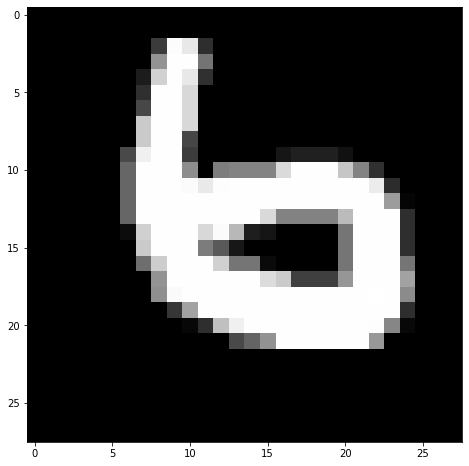

In [19]:
i = np.random.randint(0, len(test_X))
prediction = predict(W, B, test_data[i][0], len(B))
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {test_y[i]}")
plt.figure(figsize=(10, 8))
plt.imshow(test_X[i], cmap="gray")

In [104]:
y = train_data[0][1]
deltas = dict()
delta_last = (A[-1] - y)*d_sigmoid(Z[-1])
deltas[L-1] = delta_last

for i in range(L-2, 0, -1):
    deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])


In [95]:
deltas[L-2] = (W[L-1].T @ deltas[L-1])* d_sigmoid(Z[L-2])

In [99]:
deltas[L-3] = (W[L-2].T @ deltas[L-2])*d_sigmoid(Z[L-3])

In [107]:
alpha = 0.004
W[1] = W[1] - alpha*deltas[1] @ A[1-1].T
B[1] = B[1] - alpha*deltas[1]

W[2] = W[2] - alpha*deltas[2] @ A[2-1].T
B[2] = B[2] - alpha*deltas[2]

W[3] = W[3] - alpha*deltas[3] @ A[3-1].T
B[3] = B[3] - alpha*deltas[3]

In [109]:
for i in range(1, L):
    W[i] -= alpha*deltas[i] @ A[i-1].T
    B[i] -= alpha*deltas[i]

In [11]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B


In [10]:
w=np.random.randn(layer_size[l],layer_size[l-1])*np.sqrt(2/layer_size[l-1])

In [13]:
test_W[3].shape

(10, 60)

In [45]:
def deltas(W, B, x, depth):
    Z, A = forward_pass(W, B, x, depth)
    L = depth
    delta = dict()
    delta[L] = (A[-1] - x[1])*d_sigmoid(Z[-1])
    for i in range(L-1, 1, -1):
        delta[i] = (delta[i+1]@W[i].T)*d_sigmoid(Z[-1])
    
    return A, delta

In [46]:
deltas(test_W, test_B, train_data[0][0], 4)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 784)

In [17]:
train_data

[]

In [18]:
test_data

[]

In [21]:
train_data

[]

In [22]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [27]:
np.zeros((10, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])